In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Check GDrive connection
# NOTE: You should change this path based on your real configuration
#tutorial_path = '/content/drive/MyDrive/1. Teaching/Information Retrieval/Tutorial/'
tutorial_path = '/content/drive/MyDrive/Cao hoc/AntoanHTTT/Demo'
# Code goc %cd '$tutorial_path'
%cd $tutorial_path 

/content/drive/MyDrive/Cao hoc/AntoanHTTT/Demo


In [3]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bin_data = pd.read_csv('datasets/bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('datasets/multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('labels/le2_classes.npy',allow_pickle=True)

# **Linear Support Vector Machine Classifier (Binary Classification)**

In [5]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [6]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [7]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [8]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [9]:
pkl_filename = "./models/lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [10]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69460849685655


In [11]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [12]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [13]:
pkl_filename = "./models/qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [14]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [15]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



# **K-nearest-neighbor Classifier (Binary Classification)**

In [16]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [18]:
pkl_filename = "./models/knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [19]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.5711564107449


In [20]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [21]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [23]:
pkl_filename = "./models/lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [24]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [25]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [26]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [28]:
pkl_filename = "./models/qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [29]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  68.84168413031053


In [30]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.50     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.67      0.64     31494
weighted avg       0.80      0.69      0.65     31494



# **Multi Layer Perceptron Classifier (Binary Classification)**

In [31]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [32]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [33]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [34]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [35]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,751
Trainable params: 4,751
Non-trainable params: 0
_________________________________________________________________


In [37]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 4s 15ms/step - loss: 0.5340 - accuracy: 0.7474 - val_loss: 0.4305 - val_accuracy: 0.9097
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3742 - accuracy: 0.9167 - val_loss: 0.3174 - val_accuracy: 0.9254
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2844 - accuracy: 0.9256 - val_loss: 0.2513 - val_accuracy: 0.9309
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9302 - val_loss: 0.2112 - val_accuracy: 0.9386
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1972 - accuracy: 0.9453 - val_loss: 0.1854 - val_accuracy: 0.9538
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1748 - accuracy: 0.9557 - val_loss: 0.1668 - val_accuracy: 0.9600
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.9615 - val_loss: 0.1528 - val_accuracy: 0.9633
Epoch 8/100


In [38]:
filepath = './models/mlp_binary.json'
weightspath = './weights/mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [39]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 [==============================] - 2s 2ms/step - loss: 0.0632 - accuracy: 0.9783
Test results - Loss: 0.06318581104278564 - Accuracy: 97.83450961112976


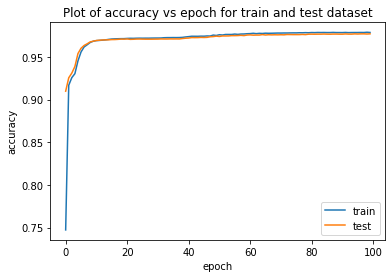

In [41]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_accuracy.png')
plt.show()

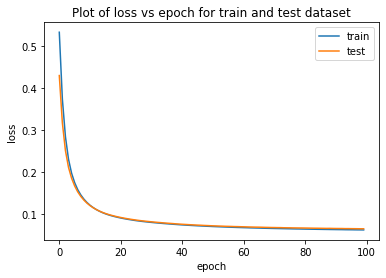

In [42]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_binary_loss.png')
plt.show()

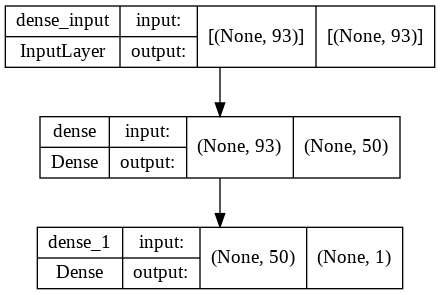

In [43]:
# representation of model layers
from keras.utils.vis_utils import plot_model
plot_model(mlp, to_file='plots/mlp_binary.png', show_shapes=True,)

# **Long Short-Term Memory Classifier (Binary Classification)**

In [44]:
# importing library for LSTM layers
from keras.layers import LSTM

In [45]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [46]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [47]:
X_train = X_train.to_numpy()

In [48]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [49]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [50]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
# summary of model layers
lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 93, 50)            10400     
                                                                 
 dense_2 (Dense)             (None, 93, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [52]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 6s 83ms/step - loss: 0.6909 - accuracy: 0.5187 - val_loss: 0.6883 - val_accuracy: 0.5636
Epoch 2/100
16/16 [==============================] - 1s 54ms/step - loss: 0.6584 - accuracy: 0.5842 - val_loss: 0.5260 - val_accuracy: 0.7900
Epoch 3/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4699 - accuracy: 0.8094 - val_loss: 0.4326 - val_accuracy: 0.8202
Epoch 4/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4324 - accuracy: 0.8191 - val_loss: 0.4170 - val_accuracy: 0.8284
Epoch 5/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4226 - accuracy: 0.8248 - val_loss: 0.4139 - val_accuracy: 0.8298
Epoch 6/100
16/16 [==============================] - 1s 55ms/step - loss: 0.4198 - accuracy: 0.8258 - val_loss: 0.4127 - val_accuracy: 0.8304
Epoch 7/100
16/16 [==============================] - 1s 49ms/step - loss: 0.4187 - accuracy: 0.8261 - val_loss: 0.4105 - val_accuracy: 0.8311
Epoch 

In [53]:
X_test.shape

(31494, 93)

In [54]:
X_test.head()

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
378,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,1.066401,0.499962,0.771283,0,...,0,0,0,0,0,0,0,0,1,0
32038,-0.367725,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.782367,-0.647258,-0.911985,0,...,0,0,0,0,1,0,0,0,0,0
86399,1.745661,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.982836,-0.864056,-1.344175,0,...,0,0,0,0,1,0,0,0,0,0
74412,0.226119,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.916013,-0.800824,-1.344175,0,...,1,0,0,0,0,0,0,0,0,0
52951,-0.725778,-0.631929,-0.637209,-0.549600,-0.624871,-0.809262,-1.138756,-1.035688,0.771283,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
X_test = X_test.to_numpy() # code goc thieu line nay
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# code goc: x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [56]:
filepath = './models/lst_binary.json'
weightspath = './weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [57]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 5s 4ms/step - loss: 0.3954 - accuracy: 0.8302
Test results - Loss: 0.3953503370285034 - Accuracy: 83.0240249633789%


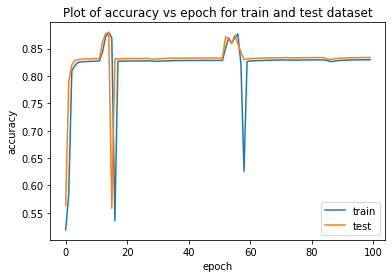

In [59]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_accuracy.png')
plt.show()

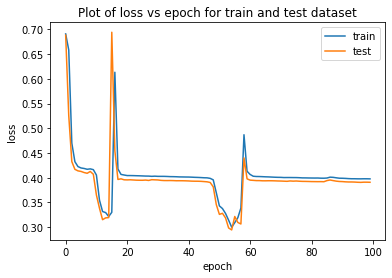

In [60]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/lstm_binary_loss.png')
plt.show()

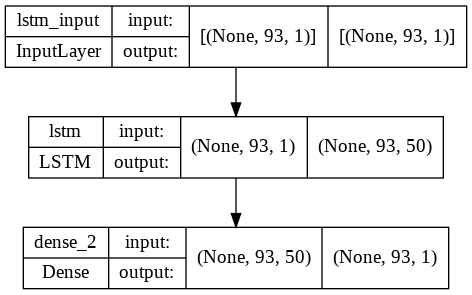

In [61]:
# representation of model layers
plot_model(lst, to_file='plots/lstm_binary.png', show_shapes=True,)

# **Auto Encoder Classifier (Binary Classification)**

In [62]:
from keras.layers import Input
from keras.models import Model

In [63]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [64]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [65]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [66]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [67]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [68]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_3 (Dense)             (None, 50)                4700      
                                                                 
 dense_4 (Dense)             (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [69]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1140 - accuracy: 0.3721 - val_loss: 0.1061 - val_accuracy: 0.4868
Epoch 2/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1053 - accuracy: 0.5540 - val_loss: 0.1053 - val_accuracy: 0.6065
Epoch 3/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1049 - accuracy: 0.6196 - val_loss: 0.1051 - val_accuracy: 0.6700
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.6797 - val_loss: 0.1050 - val_accuracy: 0.7129
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1047 - accuracy: 0.7492 - val_loss: 0.1050 - val_accuracy: 0.7514
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7794 - val_loss: 0.1048 - val_accuracy: 0.7919
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.7986 - val_loss: 0.1048 - val_accuracy: 0.8175

In [70]:
filepath = './models/ae_binary.json'
weightspath = './weights/ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [71]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [72]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 [==============================] - 2s 2ms/step - loss: 0.1046 - accuracy: 0.8762
Test results - Loss: 0.10463199764490128 - Accuracy: 0.8761986494064331%


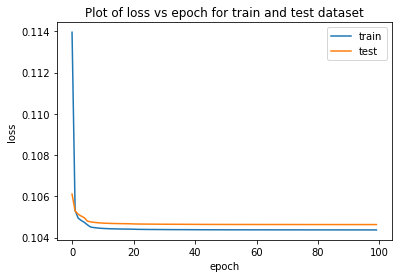

In [73]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_binary_loss.png')
plt.show()

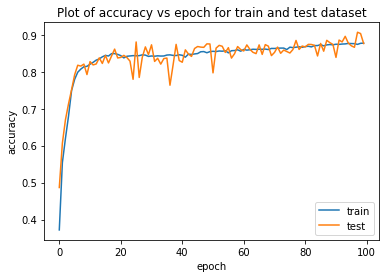

In [74]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_binary_accuracy.png')
plt.show()

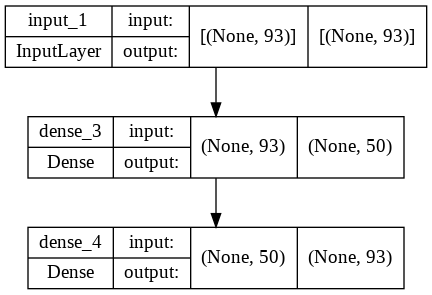

In [75]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_binary.png', show_shapes=True,)

In [76]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

In [77]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [78]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104632,0.532609
std,0.043513,0.498943
min,0.040631,0.000000
25%,0.074705,0.000000
50%,0.083821,1.000000
75%,0.151404,1.000000
max,0.229788,1.000000


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [79]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [80]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [81]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [82]:
# saving trained model to disk
pkl_filename = "./models/lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

In [83]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24671365974471


In [84]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.60       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [85]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [86]:
pkl_filename = "./models/qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [87]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [88]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [89]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [90]:
pkl_filename = "./models/knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [91]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.29173810884613


In [92]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.96      0.96      2947
         R2L       0.89      0.87      0.88       274
         U2R       1.00      0.07      0.12        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.96      0.77      0.79     31494
weighted avg       0.98      0.98      0.98     31494



# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [93]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [94]:
pkl_filename = "./models/lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

In [95]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [96]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [97]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [98]:
pkl_filename = "./models/qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [99]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  44.61167206452023


In [100]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.41      0.58     11484
       Probe       0.97      0.06      0.11      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.49      0.53      0.51     16774

    accuracy                           0.45     31494
   macro avg       0.50      0.40      0.25     31494
weighted avg       0.71      0.45      0.49     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [101]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [102]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [103]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [104]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# summary of model layers
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                4700      
                                                                 
 dense_6 (Dense)             (None, 5)                 255       
                                                                 
Total params: 4,955
Trainable params: 4,955
Non-trainable params: 0
_________________________________________________________________


In [106]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 1.3122 - accuracy: 0.6393 - val_loss: 1.0228 - val_accuracy: 0.8448
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8469 - accuracy: 0.8583 - val_loss: 0.6612 - val_accuracy: 0.8712
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5653 - accuracy: 0.8693 - val_loss: 0.4722 - val_accuracy: 0.8734
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4265 - accuracy: 0.8739 - val_loss: 0.3828 - val_accuracy: 0.8852
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3570 - accuracy: 0.8921 - val_loss: 0.3331 - val_accuracy: 0.9116
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3146 - accuracy: 0.9146 - val_loss: 0.2996 - val_accuracy: 0.9249
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2844 - accuracy: 0.9284 - val_loss: 0.2742 - val_accuracy: 0.9334
Epoch 8/100


In [107]:
filepath = './models/mlp_multi.json'
weightspath = './weights/mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [108]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 2ms/step - loss: 0.0884 - accuracy: 0.9701
Test results - Loss: 0.08841698616743088 - Accuracy: 97.00577855110168%


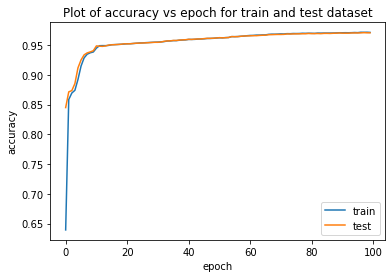

In [110]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

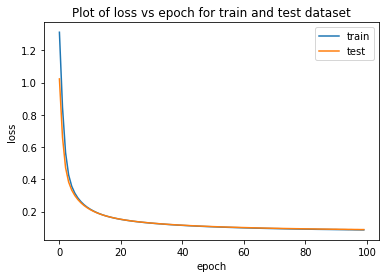

In [111]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/mlp_multi_loss.png')
plt.show()

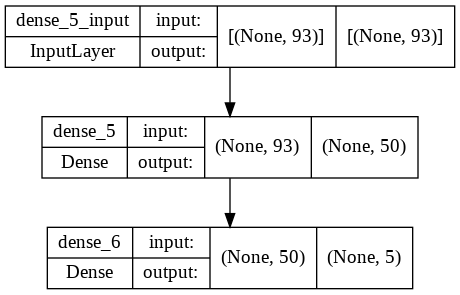

In [112]:
# representation of model layers
plot_model(mlp, to_file='plots/mlp_multi.png', show_shapes=True,)

# **Auto Encoder Classifier (Multi-class Classification)**

In [113]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [114]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [115]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [116]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [117]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [118]:
# summary of model layers
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense_7 (Dense)             (None, 50)                4700      
                                                                 
 dense_8 (Dense)             (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [119]:
# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1140 - accuracy: 0.1716 - val_loss: 0.1060 - val_accuracy: 0.3476
Epoch 2/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.6042 - val_loss: 0.1052 - val_accuracy: 0.7175
Epoch 3/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.7215 - val_loss: 0.1049 - val_accuracy: 0.7218
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7373 - val_loss: 0.1048 - val_accuracy: 0.7441
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7583 - val_loss: 0.1048 - val_accuracy: 0.7697
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.7931 - val_loss: 0.1047 - val_accuracy: 0.8263
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.8203 - val_loss: 0.1047 - val_accuracy: 0.8435

In [120]:
filepath = './models/ae_multi.json'
weightspath = './weights/ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [121]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [122]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9189
Test results - Loss: 0.1045341044664383 - Accuracy: 91.88734292984009%


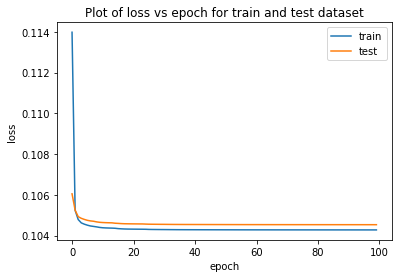

In [123]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('plots/ae_multi_loss.png')
plt.show()

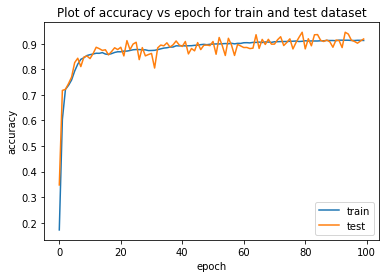

In [124]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('plots/ae_multi_accuracy.png')
plt.show()

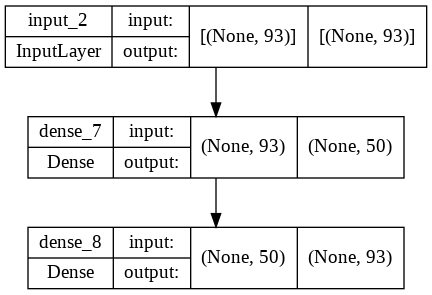

In [125]:
# representation of model layers
plot_model(autoencoder, to_file='plots/ae_multi.png', show_shapes=True,)

In [126]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

In [127]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [128]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104534,2.242840
std,0.043605,1.903732
min,0.040628,0.000000
25%,0.074427,0.000000
50%,0.083821,4.000000
75%,0.151405,4.000000
max,0.229810,4.000000
